In [5]:
from sklearn import datasets
import pandas as pd

In [23]:
titanic = datasets.fetch_openml("titanic", version=1)
df = titanic.frame
df.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_arff_parser.py:200: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame = pd.concat(dfs, ignore_index=True)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [24]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [25]:
df['age'].fillna(df['age'].median(), inplace=True)

In [26]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1309 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [42]:
df.duplicated().sum()

0

In [36]:
sex = df['sex']
sex.value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [38]:
age = df['age']
age.head()

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x22a76dd28d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22a6a9104d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a76599a50>],
 'medians': [<matplotlib.lines.Line2D at 0x22a76de1b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a76de2690>],
 'means': []}

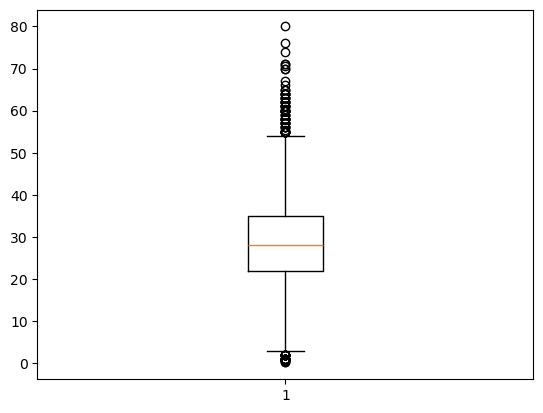

In [43]:
import matplotlib.pyplot as plt

plt.boxplot(df['age'])

In [45]:
age_q1 = df['age'].quantile(0.25)
age_q3 = df['age'].quantile(0.75)
iqr = age_q3 - age_q1

age_lower = age_q1 - 1.5 * iqr
age_upper = age_q3 + 1.5 * iqr

age_outliers = df[(df['age'] < age_lower) | (df['age'] > age_upper)]
print(age_outliers[['age']])

          age
1      0.9167
2      2.0000
6     63.0000
9     71.0000
14    80.0000
...       ...
1225  60.5000
1230   2.0000
1235  74.0000
1240   0.4167
1261  63.0000

[101 rows x 1 columns]


In [46]:
age_lower

2.5

In [47]:
age_upper

54.5

In [51]:
df = df[(df['age'] >= age_lower) & (df['age'] <= age_upper)]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1208 non-null   float64 
 1   survived   1208 non-null   category
 2   name       1208 non-null   object  
 3   sex        1208 non-null   category
 4   age        1208 non-null   float64 
 5   sibsp      1208 non-null   float64 
 6   parch      1208 non-null   float64 
 7   ticket     1208 non-null   object  
 8   fare       1208 non-null   float64 
 9   cabin      250 non-null    object  
 10  embarked   1207 non-null   category
 11  boat       443 non-null    object  
 12  body       105 non-null    float64 
 13  home.dest  667 non-null    object  
dtypes: category(3), float64(6), object(5)
memory usage: 117.2+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x22a76f53190>,
 'caps': [<matplotlib.lines.Line2D at 0x22a76f5c5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a76f52990>],
 'medians': [<matplotlib.lines.Line2D at 0x22a76f5d6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a76f5e010>],
 'means': []}

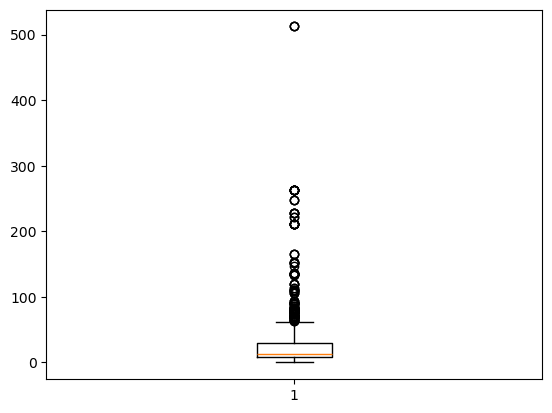

In [54]:
plt.boxplot(df['fare'])

In [55]:
fare_q1 = df['fare'].quantile(0.25)
fare_q3 = df['fare'].quantile(0.75)
iqr = fare_q3 - fare_q1

fare_lower = fare_q1 - 1.5 * iqr
fare_upper = fare_q3 + 1.5 * iqr

fare_outliers = df[(df['fare'] < fare_lower) | (df['fare'] > fare_upper)]
print(fare_outliers[['fare']])

          fare
0     211.3375
3     151.5500
4     151.5500
10    227.5250
11    227.5250
...        ...
1176   69.5500
1177   69.5500
1178   69.5500
1179   69.5500
1180   69.5500

[153 rows x 1 columns]


In [56]:
df = df[(df['fare'] >= fare_lower) & (df['fare'] <= fare_upper)]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 5 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1055 non-null   float64 
 1   survived     1055 non-null   category
 2   name         1055 non-null   object  
 3   sex          1055 non-null   category
 4   age          1055 non-null   float64 
 5   sibsp        1055 non-null   float64 
 6   parch        1055 non-null   float64 
 7   ticket       1055 non-null   object  
 8   fare         1055 non-null   float64 
 9   cabin        138 non-null    object  
 10  embarked     1055 non-null   int32   
 11  boat         341 non-null    object  
 12  body         92 non-null     float64 
 13  home.dest    553 non-null    object  
 14  family_size  1055 non-null   float64 
dtypes: category(2), float64(7), int32(1), object(5)
memory usage: 113.6+ KB


In [58]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df[['sibsp', 'parch', 'family_size']].head()

,sibsp,parch,family_size
5,0.0,0.0,1.0
7,0.0,0.0,1.0
8,2.0,0.0,3.0
15,0.0,0.0,1.0
20,1.0,1.0,3.0


In [59]:
df.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_size
5,1.0,1,"Anderson, Mr. Harry",male,48.0,0.0,0.0,19952,26.55,E12,S,3,NaN,"New York, NY",1.0


In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
label_encoder = LabelEncoder()

In [62]:
df['embarked'] = label_encoder.fit_transform(df['embarked'])
df[['embarked']].head()

,embarked
5,2
7,2
8,2
15,2
20,2


In [64]:
df[['embarked']].value_counts()

embarked
2           770
0           171
1           114
Name: count, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 5 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1055 non-null   float64 
 1   survived     1055 non-null   category
 2   name         1055 non-null   object  
 3   sex          1055 non-null   category
 4   age          1055 non-null   float64 
 5   sibsp        1055 non-null   float64 
 6   parch        1055 non-null   float64 
 7   ticket       1055 non-null   object  
 8   fare         1055 non-null   float64 
 9   cabin        138 non-null    object  
 10  embarked     1055 non-null   int32   
 11  boat         341 non-null    object  
 12  body         92 non-null     float64 
 13  home.dest    553 non-null    object  
 14  family_size  1055 non-null   float64 
dtypes: category(2), float64(7), int32(1), object(5)
memory usage: 113.6+ KB


In [65]:
import re

In [66]:
df['name'] = df['name'].apply(lambda x: re.sub(r'([A-Za-z]+)\.', '', x))

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 5 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1055 non-null   float64 
 1   survived     1055 non-null   category
 2   name         1055 non-null   object  
 3   sex          1055 non-null   category
 4   age          1055 non-null   float64 
 5   sibsp        1055 non-null   float64 
 6   parch        1055 non-null   float64 
 7   ticket       1055 non-null   object  
 8   fare         1055 non-null   float64 
 9   cabin        138 non-null    object  
 10  embarked     1055 non-null   int32   
 11  boat         341 non-null    object  
 12  body         92 non-null     float64 
 13  home.dest    553 non-null    object  
 14  family_size  1055 non-null   float64 
dtypes: category(2), float64(7), int32(1), object(5)
memory usage: 113.6+ KB


In [68]:
df['name'] = df['name'].str.lower()
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_size
5,1.0,1,"anderson, harry",male,48.0,0.0,0.0,19952,26.5500,E12,2,3,NaN,"New York, NY",1.0
7,1.0,0,"andrews, thomas jr",male,39.0,0.0,0.0,112050,0.0000,A36,2,None,NaN,"Belfast, NI",1.0
8,1.0,1,"appleton, edward dale (charlotte lamson)",female,53.0,2.0,0.0,11769,51.4792,C101,2,D,NaN,"Bayside, Queens, NY",3.0
15,1.0,0,"baumann, john d",male,28.0,0.0,0.0,PC 17318,25.9250,None,2,None,NaN,"New York, NY",1.0
20,1.0,1,"beckwith, richard leonard",male,37.0,1.0,1.0,11751,52.5542,D35,2,5,NaN,"New York, NY",3.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 5 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1055 non-null   float64 
 1   survived     1055 non-null   category
 2   name         1055 non-null   object  
 3   sex          1055 non-null   category
 4   age          1055 non-null   float64 
 5   sibsp        1055 non-null   float64 
 6   parch        1055 non-null   float64 
 7   ticket       1055 non-null   object  
 8   fare         1055 non-null   float64 
 9   cabin        138 non-null    object  
 10  embarked     1055 non-null   int32   
 11  boat         341 non-null    object  
 12  body         92 non-null     float64 
 13  home.dest    553 non-null    object  
 14  family_size  1055 non-null   float64 
dtypes: category(2), float64(7), int32(1), object(5)
memory usage: 113.6+ KB


In [73]:
age_bins = [0, 12, 18, 60, 100]
age_labels = ['Child','Teen', 'Adult', 'Senior']

In [74]:
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [77]:
df[['age', 'age_group']].head(10)

,age,age_group
5,48.0,Adult
7,39.0,Adult
8,53.0,Adult
15,28.0,Adult
20,37.0,Adult
21,47.0,Adult
22,26.0,Adult
25,25.0,Adult
29,28.0,Adult
30,45.0,Adult


In [79]:
df['age_group'].value_counts()

age_group
Adult     947
Child      54
Teen       54
Senior      0
Name: count, dtype: int64